<a href="https://colab.research.google.com/github/Wandafebrr/PCVK_2023/blob/main/week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jobsheet 9 – Morfologi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libararies

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

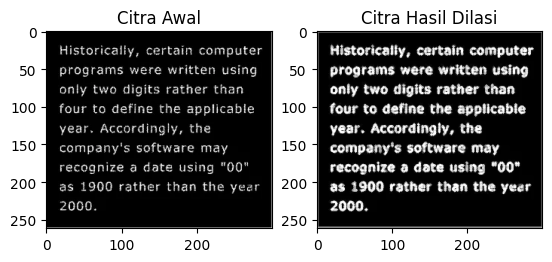

In [16]:

# Fungsi untuk melakukan dilasi
def dilate(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    k_center = (k_height // 2, k_width // 2)

    result = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            max_val = 0
            for ky in range(k_height):
                for kx in range(k_width):
                    img_y = y + ky - k_center[0]
                    img_x = x + kx - k_center[1]
                    if img_y >= 0 and img_y < height and img_x >= 0 and img_x < width:
                        if kernel[ky, kx] == 1 and image[img_y, img_x] > max_val:
                            max_val = image[img_y, img_x]
            result[y, x] = max_val

    return result

# Load gambar sumber

img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/morphology.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Kernel cross 3x3
kernel = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

# Proses dilasi
dilation = dilate(img_gray, kernel)

#fungsi subplots() kita bisa menggambar banyak plot dalam satu gambar.
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Dilasi')

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

Structuring Element (SE):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


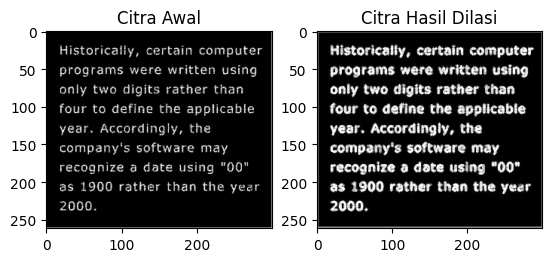

In [22]:
img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/morphology.png')

# Fungsi ones digunakan untuk membuat array dengan nilai 1, uint8 (unsigned integer 8 bit) merupakan tipe data yang digunakan untuk membuat gambar dengan menggunakan filter RGB dengan pixel dalam range [0,255].
kernel = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

 #iterator objek yang dapat diulangi, artinya Anda dapat melintasi semua nilai.
dilation = cv2.dilate(img, kernel, iterations = 1)

#fungsi subplots() kita bisa menggambar banyak plot dalam satu gambar.
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

print("Structuring Element (SE):\n", kernel)

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5x5 tanpa menggunakan library morphology dari
openCV

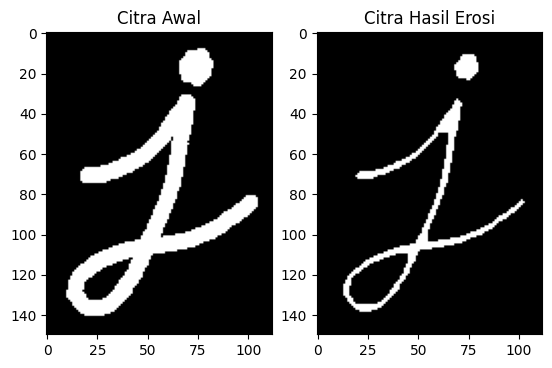

In [27]:
# Fungsi untuk melakukan erosi
def erode(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    k_center = (k_height // 2, k_width // 2)

    result = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            min_val = 255
            for ky in range(k_height):
                for kx in range(k_width):
                    img_y = y + ky - k_center[0]
                    img_x = x + kx - k_center[1]
                    if img_y >= 0 and img_y < height and img_x >= 0 and img_x < width:
                        if kernel[ky, kx] == 1 and image[img_y, img_x] < min_val:
                            min_val = image[img_y, img_x]
            result[y, x] = min_val

    return result

# Load gambar sumber
img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Kernel square 5x5
kernel = np.ones((5, 5), dtype=np.uint8)

# Proses erosi
erosion = erode(img, kernel)

# Menampilkan gambar citra awal dan hasil erosi

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

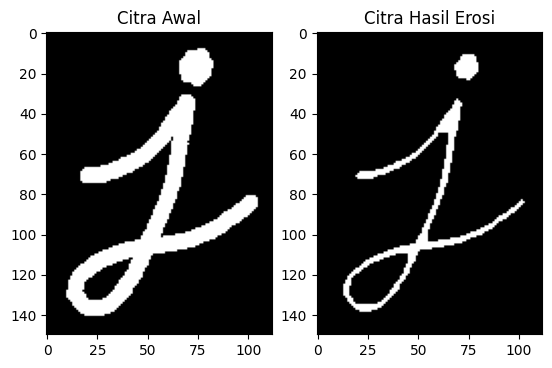

In [32]:
# Load gambar sumber
img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Kernel square 5x5
kernel = np.ones((5, 5), dtype=np.uint8)

# Proses erosi dengan library morphology dari OpenCV
erosion = cv2.erode(img, kernel, iterations=1)

# Menampilkan gambar citra awal dan hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

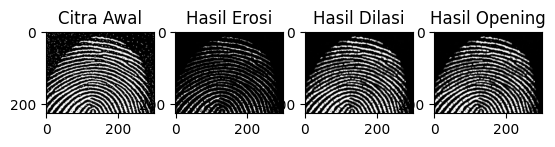

In [33]:
# Load gambar sumber
img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Kernel square 3x3
kernel = np.ones((3, 3), dtype=np.uint8)

# Proses erosi
erosion = erode(img, kernel)

# Proses dilasi
dilation = dilate(erosion, kernel)

# Menampilkan gambar citra awal, hasil erosi, hasil dilasi, dan hasil opening
plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(142), plt.imshow(erosion, cmap='gray'), plt.title('Hasil Erosi')
plt.subplot(143), plt.imshow(dilation, cmap='gray'), plt.title('Hasil Dilasi')
plt.subplot(144), plt.imshow(dilation, cmap='gray'), plt.title('Hasil Opening')
plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

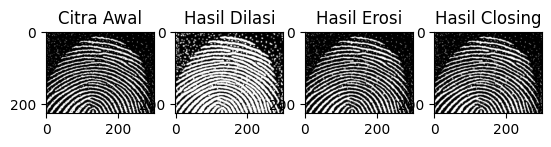

In [35]:
# Load gambar sumber
img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Kernel square 3x3
kernel = np.ones((3, 3), dtype=np.uint8)

# Proses dilasi
dilation = dilate(img, kernel)

# Proses erosi
erosion = erode(dilation, kernel)

# Menampilkan gambar citra awal, hasil dilasi, hasil erosi, dan hasil closing
plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(142), plt.imshow(dilation, cmap='gray'), plt.title('Hasil Dilasi')
plt.subplot(143), plt.imshow(erosion, cmap='gray'), plt.title('Hasil Erosi')
plt.subplot(144), plt.imshow(erosion, cmap='gray'), plt.title('Hasil Closing')
plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

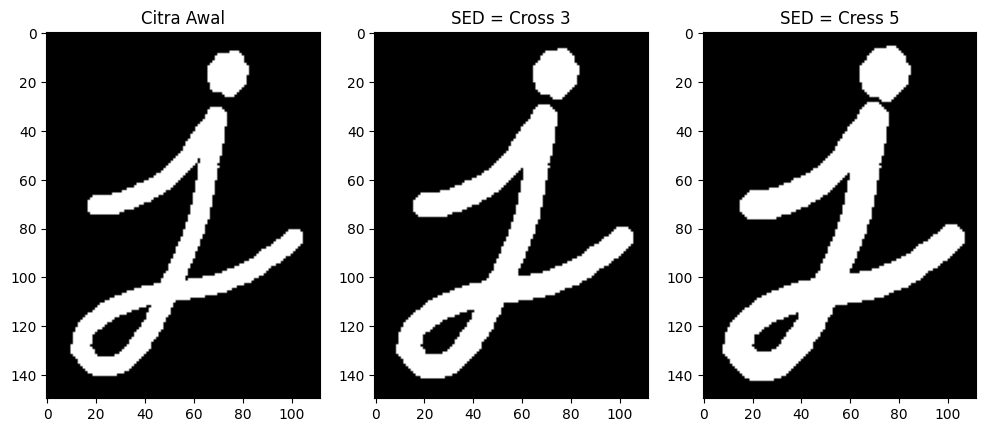

In [47]:
# Load gambar sumber
img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Kernel Cross 3x3
kernel_3x3= cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Kernel Cross 5x5
kernel_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

# Proses dilasi dengan kernel Cross 3x3
dilation_cross3x3 = cv2.dilate(img, kernel_3x3, iterations=1)

# Proses dilasi dengan kernel Cross 5x5
dilation_cross5x5 = cv2.dilate(img, kernel_5x5, iterations=1)

# Menampilkan gambar citra awal dan hasil dilasi dengan kernel Cross 3x3 dan 5x5
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilation_cross3x3, cmap='gray'), plt.title('SED = Cross 3')
plt.subplot(133), plt.imshow(dilation_cross5x5, cmap='gray'), plt.title('SED = Cress 5')
plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

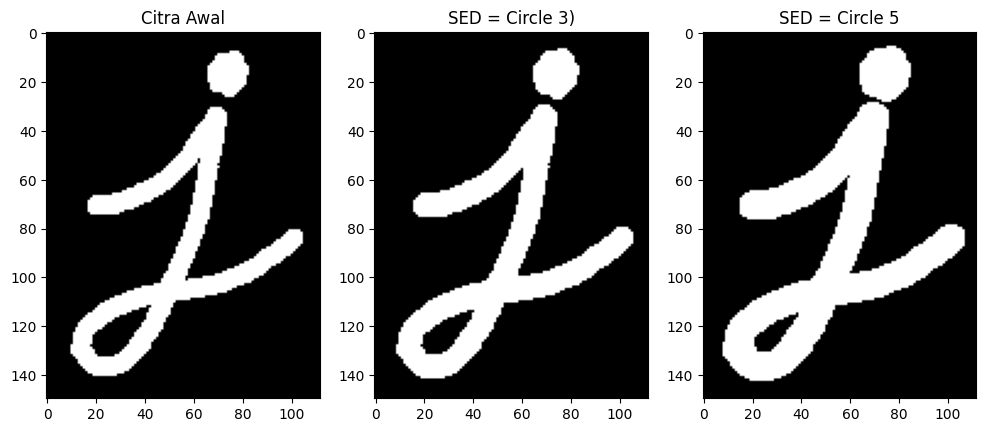

In [48]:
# Load gambar sumber
img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Kernel Circular 3x3
kernel_circular3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Kernel Circular 5x5
kernel_circular5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Proses dilasi dengan kernel Circular 3x3
dilation_circular3x3 = cv2.dilate(img, kernel_circular3x3, iterations=1)

# Proses dilasi dengan kernel Circular 5x5
dilation_circular5x5 = cv2.dilate(img, kernel_circular5x5, iterations=1)

# Menampilkan gambar citra awal dan hasil dilasi dengan kernel Circular 3x3 dan 5x5
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilation_circular3x3, cmap='gray'), plt.title('SED = Circle 3)')
plt.subplot(133), plt.imshow(dilation_circular5x5, cmap='gray'), plt.title('SED = Circle 5')
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

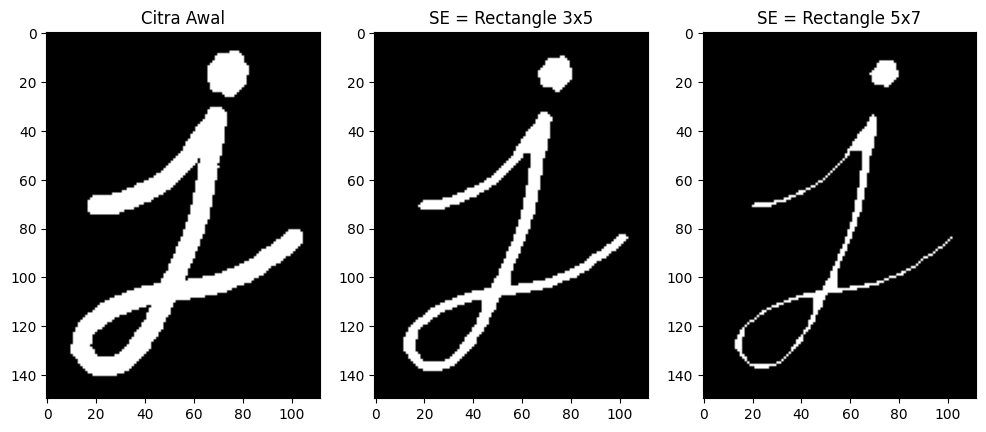

In [49]:
# Load gambar sumber
img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Kernel Rectangle 3x5
kernel_rect3x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))

# Kernel Rectangle 5x7
kernel_rect5x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))

# Proses erosi dengan kernel Rectangle 3x5
erosion_rect3x5 = cv2.erode(img, kernel_rect3x5, iterations=1)

# Proses erosi dengan kernel Rectangle 5x7
erosion_rect5x7 = cv2.erode(img, kernel_rect5x7, iterations=1)

# Menampilkan gambar citra awal dan hasil erosi dengan kernel Rectangle 3x5 dan 5x7
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion_rect3x5, cmap='gray'), plt.title('SE = Rectangle 3x5')
plt.subplot(133), plt.imshow(erosion_rect5x7, cmap='gray'), plt.title('SE = Rectangle 5x7')
plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

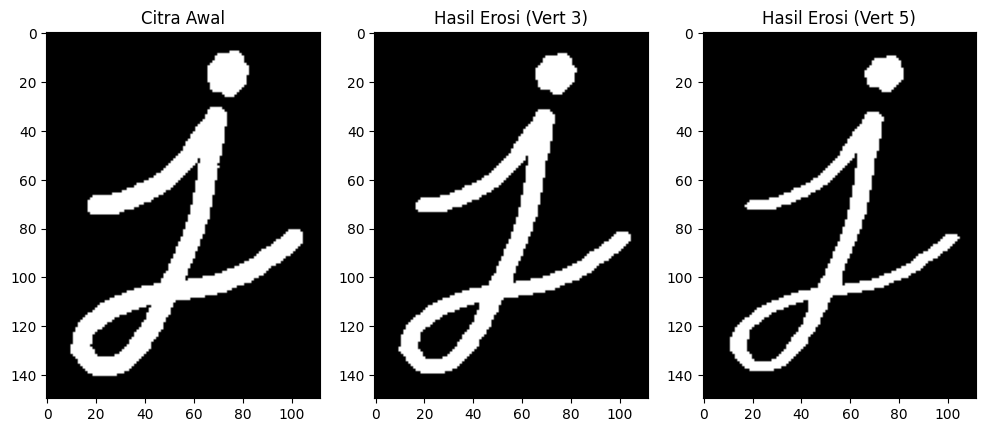

In [51]:
# Load gambar sumber
img = cv2.imread('/content/drive/MyDrive/pcvk/Pengolahan Citra dan Komputer Vision/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Kernel Line Vertikal 3
kernel_line_vert3 = np.ones((3, 1), dtype=np.uint8)

# Kernel Line Vertikal 5
kernel_line_vert5 = np.ones((5, 1), dtype=np.uint8)

# Proses erosi dengan kernel Line Vertikal 3
erosion_line_vert3 = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel_line_vert3)

# Proses erosi dengan kernel Line Vertikal 5
erosion_line_vert5 = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel_line_vert5)

# Menampilkan gambar citra awal dan hasil erosi dengan kernel Line Vertikal 3 dan 5
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion_line_vert3, cmap='gray'), plt.title('Hasil Erosi (Vert 3)')
plt.subplot(133), plt.imshow(erosion_line_vert5, cmap='gray'), plt.title('Hasil Erosi (Vert 5)')
plt.show()